In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyDFN3D as dfnpy

work_dir=%pwd
print('Current Workdir=',work_dir)

Current Workdir= F:\PyDFN3D\Examples


In [20]:
Case1=dfnpy.DFN_Model()
#Case1.loadDFN('..\Datas\DFN_2fracs.dat')
#Case1.loadDFN('..\Datas\DFN_4fracs.dat')
#Case1.loadDFN('..\Datas\DFN_4fracs_Well.dat')
Case1.loadDFN('..\Datas\dfnworks_4rects_Well.dat')

[Input] Reading "..\Datas\dfnworks_4rects_Well.dat" DFN file....
Dimension= 3
Number of Points= 25
Number of Fractures= 4
Number of Intersections= 3
Number of Wells= 2
Fracture 0 has Intersections of  [0, 1, 2]
Fracture 1 has Intersections of  [0]
Fracture 2 has Intersections of  [1]
Fracture 3 has Intersections of  [2]


------------Setting up Fracture 1------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:23(Total) 14(Edge) 9(Trace)
[Mesh] Number of Nodes:69(Total) 42(Edge) 27(Trace) 0(Source)
------------Setting up Fracture 2------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:16(Total) 12(Edge) 3(Trace)
[Mesh] Number of Nodes:46(Total) 36(Edge) 9(Trace) 1(Source)
------------Setting up Fracture 3------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:16(Total) 12(Edge) 3(Trace)
[Mesh] Number of Nodes:46(Total) 36(Edge) 9(Trace) 1(Source)
------------Setting up Fracture 4------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:16(Total) 12(Edge) 3(Trace)
[Mesh] Number of Nodes:46(Total) 36(Edge) 9(Trace) 1(Source)
Total DOF= 207

------------ Fracture 0------------


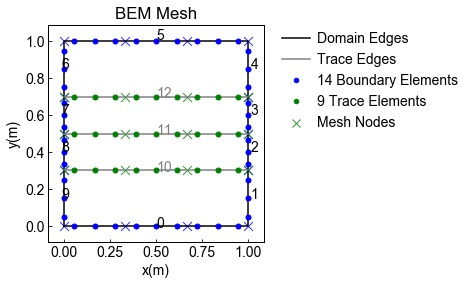


------------ Fracture 1------------


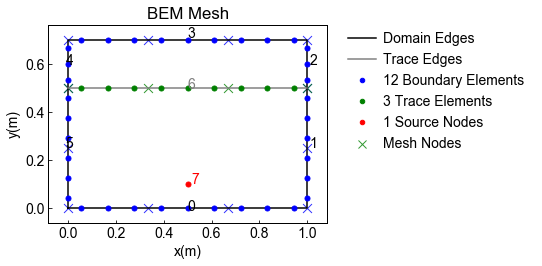


------------ Fracture 2------------


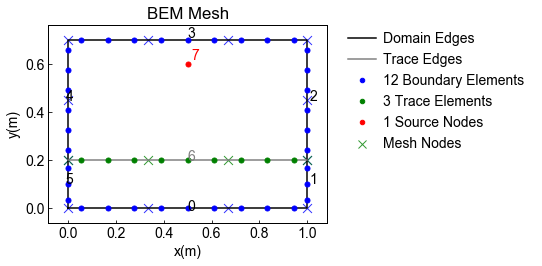


------------ Fracture 3------------


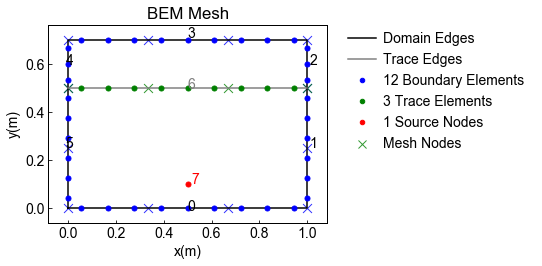

In [25]:
h_mesh_frac=1/3
Case1.setFlowSolver(solver='BEM',h_frac=h_mesh_frac,h_trace=h_mesh_frac)

for i in range(Case1.FracNets.NumFracs):
    print('\n------------ Fracture %d------------'%(i))
    Case1.FlowSolver.showMesh(i)

## Set up boundary conditions

In [26]:
#2. Set up boundary condition automatically
#Inlets=[(2,7,'Dirichlet',2e6)] #Inlets (fracID,BdID,BCtype,BCvalue)
Inlets=[(2,3,'Dirichlet',2e6)] #Inlets (fracID,BdID,BCtype,BCvalue)
#Outlets=[(1,7,'Dirichlet',1e6),(3,7,'Dirichlet',1e6)] #Outlets (fracID,BdID)
Outlets=[(1,0,'Dirichlet',1e6),(3,0,'Dirichlet',1e6)] #Outlets (fracID,BdID)

for BC in Inlets+Outlets:
    fracID,BDID,BC_type,BC_val=BC
    if(BC_type=='Dirichlet'):
        Case1.setBoundaryConditions(fracID=fracID,DirichletBC=[(BDID,BC_val)])
    if(BC_type=='Neumann'):
        Case1.setBoundaryConditions(fracID=fracID,NeumannBC=[(BDID,BC_val)])

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(3, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(0, 1000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(0, 1000000.0)]


## Set up frac props and solve

[Solution] #DOFs= 69
[Solution] #DOFs= 46
[Solution] #DOFs= 46
[Solution] #DOFs= 46
1	1.0		alpha:	0.5
10	0.06325759885157761		alpha:	1133812706.8727424
20	0.00010030395571165138		alpha:	118038278.43858096
30	1.6925785405136325e-05		alpha:	127297320.069088
40	9.962812591226982e-07		alpha:	1779451610.7202184
50	9.152659269247343e-08		alpha:	540039209.0990655
60	3.309440834101297e-09		alpha:	134298518.4526698
70	4.1155624030631545e-10		alpha:	1465838575.3142545
80	2.5465830486612654e-11		alpha:	115346045.90742405
Converged at 89 Steps! TOL= 1e-14
Dirichelt [1294117.6470588 1294117.6470588 1294117.6470588 1294117.6470588
 1294117.6470588 1294117.6470588 1294117.6470588 1294117.6470588
 1294117.6470588]
Neumann [-5.88235294e-05 -5.88235294e-05 -5.88235294e-05 -5.88235294e-05
 -5.88235294e-05 -5.88235294e-05 -5.88235294e-05 -5.88235294e-05
 -5.88235294e-05]
[Solution] Total Time= 3.443906784057617 secs
	 Matrix Assembling Time= 0.08499693870544434 secs (2.47%)
	 Matrix solving Time= 3.311888

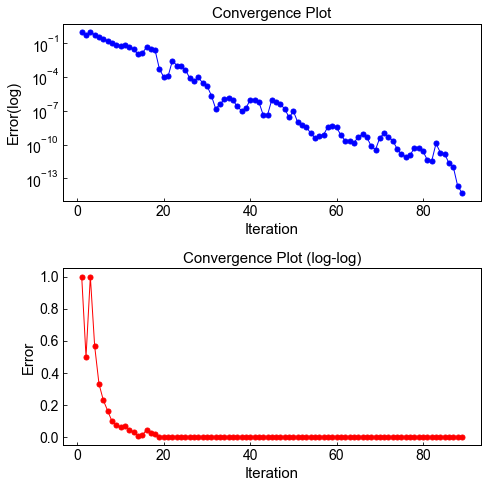

[Solution] CPU Time= 3.83587908744812 secs


In [27]:
Case1.setFracProperties(perm=3e-10,aperature=0.001)
Case1.solveFlow(max_iters=500,tolerance=1e-14)

### Check mass balance error and write Paraview file

In [28]:
Q_in=0.0
Q_out=0.0
for BC in Inlets:
    fracID,BDID,BC_type,BC_val=BC
    Flux=Case1.FlowSolver.SubProblems[fracID].PostProcess.get_BDFlux(BDID)
    Q_in+=Flux
    print('[Inlet Flux] Frac %d Boundary ID %d Flux=%s [m^3]'%(fracID,BDID,Flux))
for BC in Outlets:
    fracID,BDID,BC_type,BC_val=BC
    Flux=Case1.FlowSolver.SubProblems[fracID].PostProcess.get_BDFlux(BDID)
    Q_out+=Flux
    print('[Outlet Flux] Frac %d Boundary ID %d Flux=%s [m^3]'%(fracID,BDID,Flux))

print('[Mass Balance]',abs(Q_in+Q_out))

[Inlet Flux] Frac 2 Boundary ID 3 Flux=0.0003529411764706044 [m^3]
[Outlet Flux] Frac 1 Boundary ID 0 Flux=-0.0001764705882352787 [m^3]
[Outlet Flux] Frac 3 Boundary ID 0 Flux=-0.00017647058823527863 [m^3]
[Mass Balance] 4.710858439449517e-17


In [30]:
#FEM-BEM Error %0.13
(-3.534033112776075E-4 +0.0003529411764706044)/0.0003529411764706044*100

-0.13093819531753373

In [37]:
#Mesh=Case1.writeSolution(mesh_input='..\Datas\DFN_4fracs_Well.msh',fname='DFN_4fracs_Well.vtp')
Mesh=Case1.writeSolution(mesh_input='..\Datas\dfnworks_4rects_gmsh.msh',fname='dfnworks_4rects.vtp')

999999.9999999956 2000000.000000008
[Output] Saved VTK mesh and solution file Results\dfnworks_4rects_solution.vtu) !


### Verification against FEM

In [39]:
import numpy as np
from utils import *
tol=1e-3
Pts1,Pts2=(0.0+tol,0.55),(1.0-tol,0.55)

#BEM Solution
PUV=Case1.FlowSolver.SubProblems[2].PostProcess.plot_Solution_overline(Pts1,Pts2,NumSamples=40,plot=False)

#Get Comsol Data
P_ref = np.genfromtxt('.\\Verification\\dfnworks_4recs_p.csv', comments='%',delimiter=',')
u_ref = np.genfromtxt('.\\Verification\\dfnworks_4recs_u.csv', comments='%',delimiter=',')
v_ref = np.genfromtxt('.\\Verification\\dfnworks_4recs_v.csv', comments='%',delimiter=',')

-----------------Pressure over line-----------------


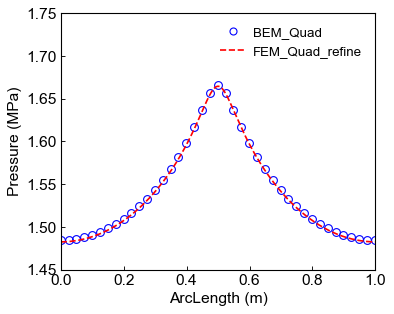

-----------------Velocity U over line-----------------


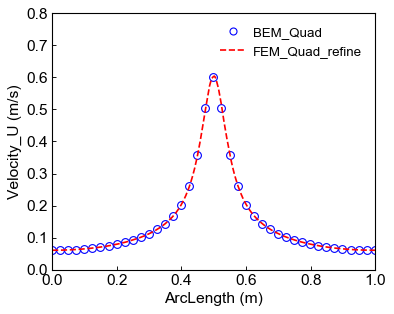

-----------------Velocity V over line-----------------


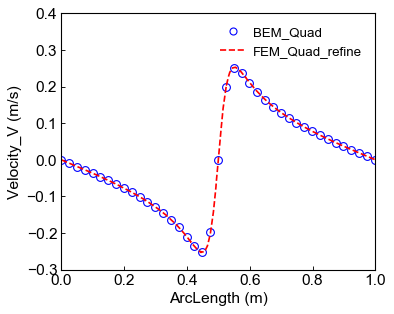

-----------------Velocity Magn over line-----------------


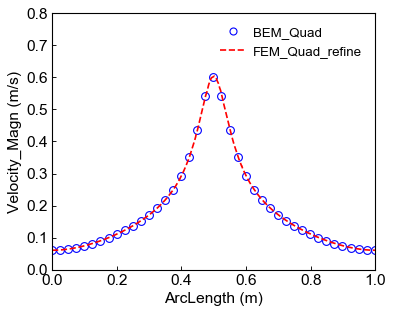

In [40]:
DataSetName=['BEM_Quad','FEM_Quad_refine']
space=1
MPa=1e6
ArcLength=[PUV[::space,0],P_ref[::space,0]]
Pressure=[PUV[::space,1]/MPa,P_ref[::space,1]/MPa]

print("-----------------Pressure over line-----------------")
plotTables(X=ArcLength,Y=Pressure, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Pressure (MPa)',Xlim=[0,1],Ylim=[1.45,1.75],
           MarkerSize=[7,0],LineWidth=[0,1.5],img_fname='Case3_PressureOverLine.pdf')


Velocity=[-PUV[::space,3],u_ref[::space,1]]

print("-----------------Velocity U over line-----------------")
plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Velocity_U (m/s)',Xlim=[0,1],Ylim=[0,0.8],
           MarkerSize=[7,0],LineWidth=[0,1.5],img_fname='Case3_VelocityYOverLine_U.pdf')

Velocity=[PUV[::space,2],v_ref[::space,1]]

print("-----------------Velocity V over line-----------------")
plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Velocity_V (m/s)',Xlim=[0,1],Ylim=[-0.3,0.4],
           MarkerSize=[7,0],LineWidth=[0,1.5],img_fname='Case3_VelocityYOverLine_V.pdf')

UMag_FEM=np.sqrt(u_ref[:,1]*u_ref[:,1]+v_ref[:,1]*v_ref[:,1])
UMag_BEM=np.sqrt(PUV[:,2]*PUV[:,2]+PUV[:,3]*PUV[:,3])
Velocity=[UMag_BEM[::space],UMag_FEM[::space]]


print("-----------------Velocity Magn over line-----------------")
plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Velocity_Magn (m/s)',Xlim=[0,1],Ylim=[0,0.8],
           MarkerSize=[7,0],LineWidth=[0,1.5],img_fname='Case3_VelocityYOverLine.pdf')

In [58]:
Case1.FlowSolver.SubProblems[2].PostProcess.get_BDSolution(7)

(array([2000000.]), array([-0.15070103]), array([-0.]), array([-0.]))

In [72]:
Case1.FlowSolver.SubProblems[3].PostProcess.get_BDFlux(2)

(0.0, 0.0)


0.0

In [93]:
Case1.FlowSolver.SubProblems[2].get_Solution((0.5,0.5))

(1764705.8823369704, -4.538385837804526e-13, -0.3529411764944523)

In [94]:
Case1.FlowSolver.SubProblems[1].get_Solution((0.5,0.2))

(1117647.0588054599, -3.891909727826714e-13, -0.17647058820819403)

In [95]:
Case1.FlowSolver.SubProblems[3].get_Solution((0.5,0.2))

(1117647.0588054836, 4.2908468458335844e-13, -0.1764705882081352)

In [96]:
-0.17647058820819403+-0.1764705882081352+0.3529411764944523

7.812306357379839e-11

In [82]:
Case1.FracNets.getFracsIntersectTable()

[[0, 1, 5, 5]]

In [83]:
Case1.FracNets.Get3DFracGeo(0)[1]

[array([0.228, 1.   , 1.14 ]), array([0.228, 0.072, 1.14 ])]

In [84]:
Case1.FracNets.Get3DFracGeo(1)[1]

[array([0.228, 1.   , 1.14 ]), array([0.228, 0.072, 1.14 ])]

In [69]:
np.dot([1,1,1],[2,2,2])

6